In [1]:
import os
import json
from collections import defaultdict
from collections import Counter
from copy import deepcopy
import matplotlib.pyplot as plt

In [2]:
RESULTS = '../results/car'

In [3]:
gemini = json.load(open(f'{RESULTS}/0_5000_gemini.json'))

In [4]:
gpt = json.load(open(f'{RESULTS}/0_5000_gpt.json'))

In [5]:
llava = [json.loads(q) for q in open(os.path.expanduser(f'{RESULTS}/0_5000_llava.jsonl'), "r")]

In [3]:
vila = [json.loads(q) for q in open(os.path.expanduser(f'{RESULTS}/0_5000_vila.jsonl'), "r")]

In [9]:
# Percentage of gt_left and gt_right
gt_left = 0
gt_right = 0
for pair in vila:
    if pair['answer'] == 'Left':
        gt_left+=1
    elif pair['answer'] == 'Right':
        gt_right+=1

In [10]:
gt_left

2503

In [11]:
gt_right

2497

# GPT

In [6]:
refine = []
rerun = []
error = []
for pair in gpt:
    new = deepcopy(pair)
    if pair['gpt_answer'] == None :
        rerun.append(pair)
    elif 'Right' in pair['gpt_answer']:
        new['gpt_answer'] = 'Right'
        refine.append(new)
    elif 'Left' in pair['gpt_answer']:
        new['gpt_answer'] = 'Left'
        refine.append(new)
    else:
        error.append(pair)
        print(pair)
        

{'image_1': 'comp_cars/test_image/100/252/2010/3e9b66fc3ffb3a.jpg', 'image_2': 'comp_cars/test_image/100/252/2013/32b66ac3539f00.jpg', 'answer': 'Right', 'gpt_answer': 'GPT error'}
{'image_1': 'comp_cars/test_image/73/446/2015/d653c7871a66c5.jpg', 'image_2': 'comp_cars/test_image/73/446/2012/b4ad8b3bf5f3af.jpg', 'answer': 'Left', 'gpt_answer': 'GPT error'}
{'image_1': 'comp_cars/test_image/14/1836/2014/df79a423d8071d.jpg', 'image_2': 'comp_cars/test_image/14/1836/2011/3f30e1e739d24d.jpg', 'answer': 'Left', 'gpt_answer': 'GPT error'}
{'image_1': 'comp_cars/test_image/77/127/2015/2fd8800c085201.jpg', 'image_2': 'comp_cars/test_image/77/127/2009/5de5ba346cacbf.jpg', 'answer': 'Left', 'gpt_answer': 'GPT error'}
{'image_1': 'comp_cars/test_image/155/811/2012/2e158e1a12d9ab.jpg', 'image_2': 'comp_cars/test_image/155/811/2009/9826f6c9abdcda.jpg', 'answer': 'Left', 'gpt_answer': 'GPT error'}
{'image_1': 'comp_cars/test_image/100/213/2010/736dbf0839a511.jpg', 'image_2': 'comp_cars/test_image/10

In [7]:
#error = []
correct_pred = []
wrong_pred = []
gt = []
correct = []
wrong = []

for pair in refine:
    gt.append(pair['answer'])
    # if pair['gpt_answer'] not in ('Left', "Right"):
    #     # print(pair)
    #     error.append(pair)
    #     continue
    if pair['answer'] == pair['gpt_answer']:
            correct.append(pair)
            correct_pred.append(pair['gpt_answer'])
    elif pair['answer'] != pair['gpt_answer']:
            wrong.append(pair)
            wrong_pred.append(pair['gpt_answer'])
    else:
        print('fuck')

In [8]:
len(correct) / (len(correct) + len(wrong))

0.7401322380284512

In [9]:
Counter(wrong_pred+correct_pred)

Counter({'Right': 2754, 'Left': 2237})

In [10]:
len(gpt)

5000

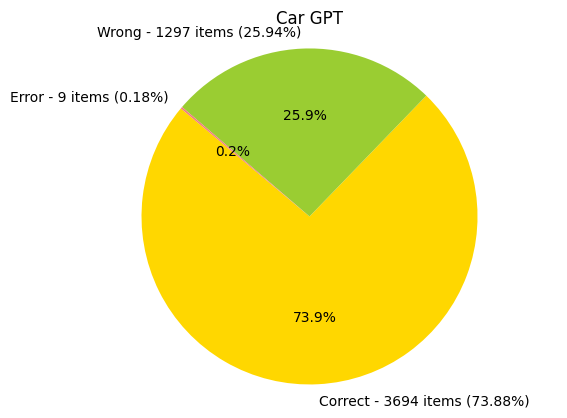

In [11]:
sizes = [len(correct), len(wrong), len(error)]
# Labels with percentages and exact counts
labels = [f'Correct - {sizes[0]} items ({sizes[0]/sum(sizes)*100:.2f}%)',
          f'Wrong - {sizes[1]} items ({sizes[1]/sum(sizes)*100:.2f}%)', 
         f'Error - {sizes[2]} items ({sizes[2]/sum(sizes)*100:.2f}%)', 
         ]

# Colors for each section
colors = ['gold', 'yellowgreen', 'lightcoral']

# Plotting the pie chart
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Car GPT')
plt.show()

# Geimini

In [12]:
gemini[0]

{'image_1': 'comp_cars/test_image/97/872/2009/c9fb135eef7588.jpg',
 'image_2': 'comp_cars/test_image/97/872/2015/7348ab38db8689.jpg',
 'answer': 'Right',
 'gemini_answer': ' Second'}

In [13]:
error = []
refine = []
for pair in gemini:
    new = deepcopy(pair)
    if 'First' in pair['gemini_answer']:
        new['gemini_answer'] = 'Left'
        refine.append(new)
    elif 'Second' in pair['gemini_answer']:
        new['gemini_answer'] = 'Right'
        refine.append(new)
    else:
        
        #refine.append(pair)
        error.append(pair)
        print(pair)
        

In [14]:
#error = []
correct_pred = []
wrong_pred = []
gt = []
correct = []
wrong = []

for pair in refine:
    gt.append(pair['answer'])
    # if pair['gemini_answer'] not in ('Left', "Right"):
    #     # print(pair)
    #     error.append(pair)
    #     continue
    if pair['answer'] == pair['gemini_answer']:
            correct.append(pair)
            correct_pred.append(pair['gemini_answer'])
    elif pair['answer'] != pair['gemini_answer']:
            wrong.append(pair)
            wrong_pred.append(pair['gemini_answer'])
    else:
        print('fuck')

In [15]:
Counter(correct_pred+wrong_pred)

Counter({'Right': 3296, 'Left': 1704})

In [16]:
len(correct) / (len(correct) + len(wrong))

0.5826

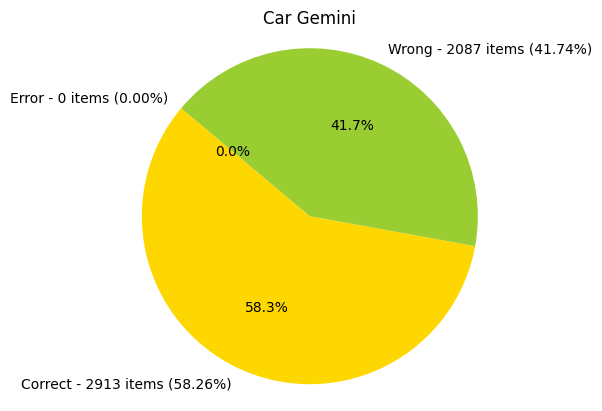

In [18]:
sizes = [len(correct), len(wrong), len(error)]
# Labels with percentages and exact counts
labels = [f'Correct - {sizes[0]} items ({sizes[0]/sum(sizes)*100:.2f}%)',
          f'Wrong - {sizes[1]} items ({sizes[1]/sum(sizes)*100:.2f}%)', 
         f'Error - {sizes[2]} items ({sizes[2]/sum(sizes)*100:.2f}%)', 
         ]

# Colors for each section
colors = ['gold', 'yellowgreen', 'lightcoral']

# Plotting the pie chart
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Car Gemini')
plt.show()

# LLaVA-1.6

In [19]:
error = []
refine = []
rerun = []
for pair in llava:
    new = deepcopy(pair)
    if pair['llava_answer'] == None :
        rerun.append(pair)
    elif 'Right' in pair['llava_answer']:
        new['llava_answer'] = 'Right'
        refine.append(new)
    elif 'Left' in pair['llava_answer']:
        new['llava_answer'] = 'Left'
        refine.append(new)
    else:
        error.append(pair)
        print(pair)

In [20]:
#error = []
correct_pred = []
wrong_pred = []
gt = []
correct = []
wrong = []

for pair in refine:
    gt.append(pair['answer'])
    # if pair['llava_answer'] not in ('Left', "Right"):
    #     # print(pair)
    #     error.append(pair)
    #     continue
    if pair['answer'] == pair['llava_answer']:
            correct.append(pair)
            correct_pred.append(pair['llava_answer'])
    elif pair['answer'] != pair['llava_answer']:
            wrong.append(pair)
            wrong_pred.append(pair['llava_answer'])
    else:
        print('fuck')

In [21]:
len(correct) / (len(correct) + len(wrong))

0.5002

In [22]:
Counter(wrong_pred+correct_pred)

Counter({'Right': 4984, 'Left': 16})

In [23]:
len(llava)

5000

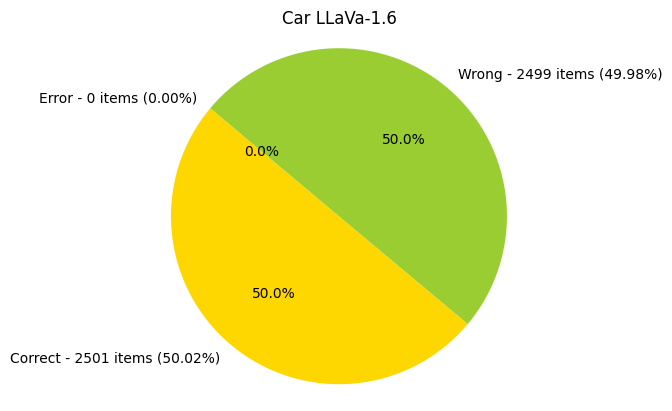

In [25]:
sizes = [len(correct), len(wrong), len(error)]
# Labels with percentages and exact counts
labels = [f'Correct - {sizes[0]} items ({sizes[0]/sum(sizes)*100:.2f}%)',
          f'Wrong - {sizes[1]} items ({sizes[1]/sum(sizes)*100:.2f}%)', 
         f'Error - {sizes[2]} items ({sizes[2]/sum(sizes)*100:.2f}%)', 
         ]

# Colors for each section
colors = ['gold', 'yellowgreen', 'lightcoral']

# Plotting the pie chart
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Car LLaVa-1.6')
plt.show()

# Vila1.5

In [5]:
error = []
refine = []
rerun = []
for pair in vila:
    new = deepcopy(pair)
    if pair['vila_answer'] == None :
        rerun.append(pair)
    elif 'Right' in pair['vila_answer']:
        new['vila_answer'] = 'Right'
        refine.append(new)
    elif 'Left' in pair['vila_answer']:
        new['vila_answer'] = 'Left'
        refine.append(new)
    else:
        error.append(pair)
        print(pair)

In [6]:
#error = []
correct_pred = []
wrong_pred = []
gt = []
correct = []
wrong = []

for pair in refine:
    gt.append(pair['answer'])
    # if pair['vila_answer'] not in ('Left', "Right"):
    #     # print(pair)
    #     error.append(pair)
    #     continue
    if pair['answer'] == pair['vila_answer']:
            correct.append(pair)
            correct_pred.append(pair['vila_answer'])
    elif pair['answer'] != pair['vila_answer']:
            wrong.append(pair)
            wrong_pred.append(pair['vila_answer'])
    else:
        print('fuck')

In [7]:
len(correct) / (len(correct) + len(wrong))

0.5324

In [8]:
Counter(wrong_pred+correct_pred)

Counter({'Left': 4841, 'Right': 159})

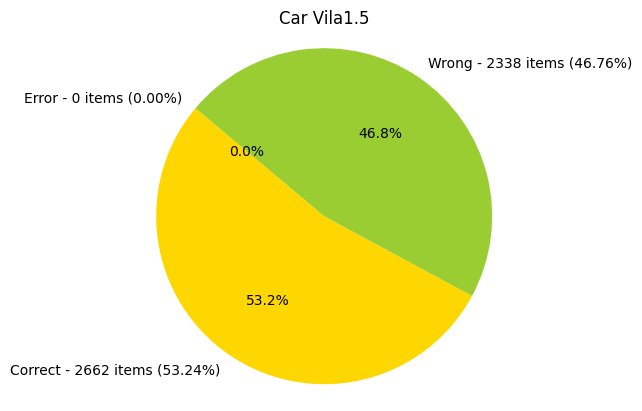

In [13]:
sizes = [len(correct), len(wrong), len(error)]
# Labels with percentages and exact counts
labels = [f'Correct - {sizes[0]} items ({sizes[0]/sum(sizes)*100:.2f}%)',
          f'Wrong - {sizes[1]} items ({sizes[1]/sum(sizes)*100:.2f}%)', 
         f'Error - {sizes[2]} items ({sizes[2]/sum(sizes)*100:.2f}%)', 
         ]

# Colors for each section
colors = ['gold', 'yellowgreen', 'lightcoral']

# Plotting the pie chart
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Car Vila1.5')
plt.show()